In [1]:
import csv
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
df.duplicated().sum()

0

In [10]:
df['customerID'].duplicated().sum()

0

# converted 0 & 1 values of SeniorCitizen to yes/no to make it easier to understand.

In [11]:
def conv(value):
    if value == 1:
        return "YES"
    else:
        return "NO"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<function matplotlib.pyplot.show(close=None, block=None)>

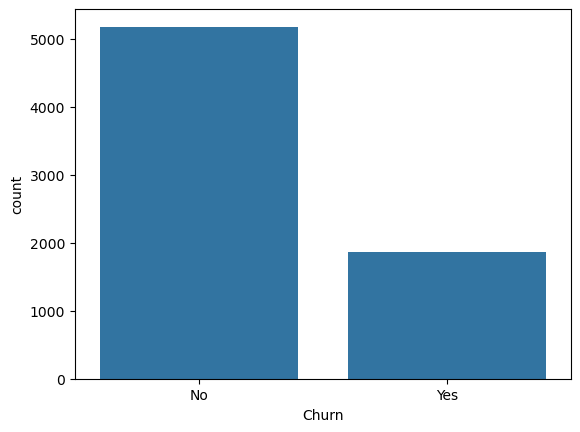

In [13]:
sns.countplot(x = 'Churn', data  = df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

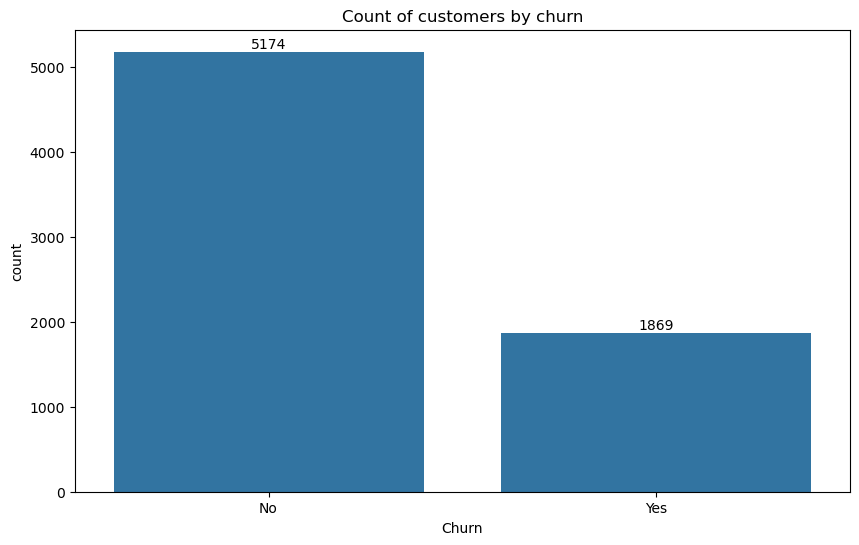

In [14]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show

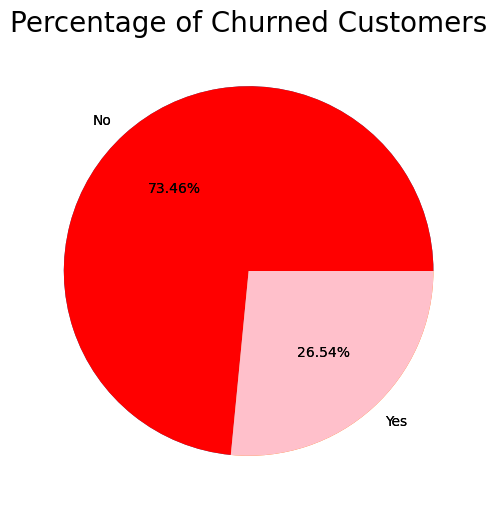

In [15]:
plt.figure(figsize = (10,6))

gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 20)


# This code is only for color in a pie chart.
colors = ['red', 'pink']
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%", colors=colors)
plt.title("Percentage of Churned Customers", fontsize=20)



plt.show()

# From that given pie chart we can conclude that 26.54% of our customers have churned out.

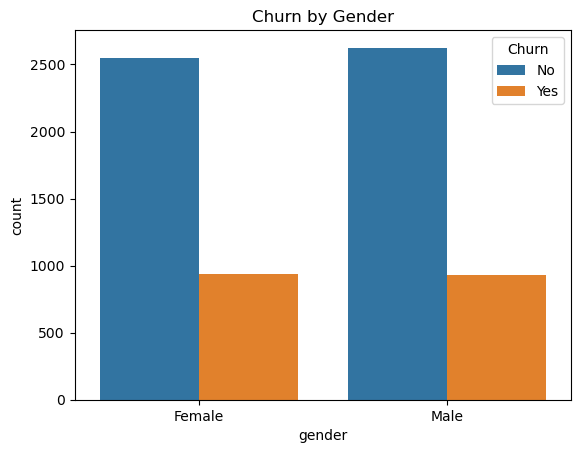

In [16]:
sns.countplot(x = 'gender', data = df,  hue = 'Churn')
plt.title("Churn by Gender")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

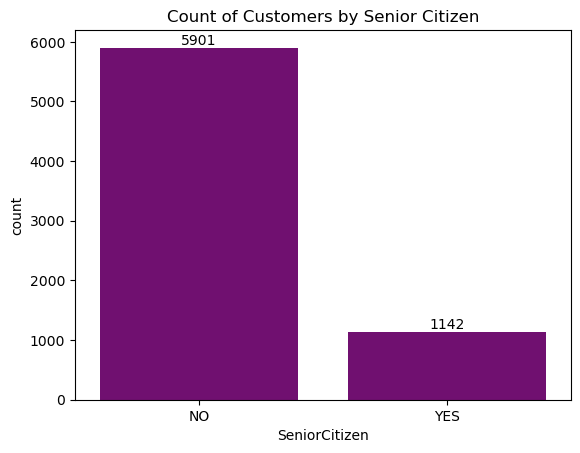

In [17]:


ax = sns.countplot(x = "SeniorCitizen", data = df, color='purple')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Senior Citizen')

plt.show

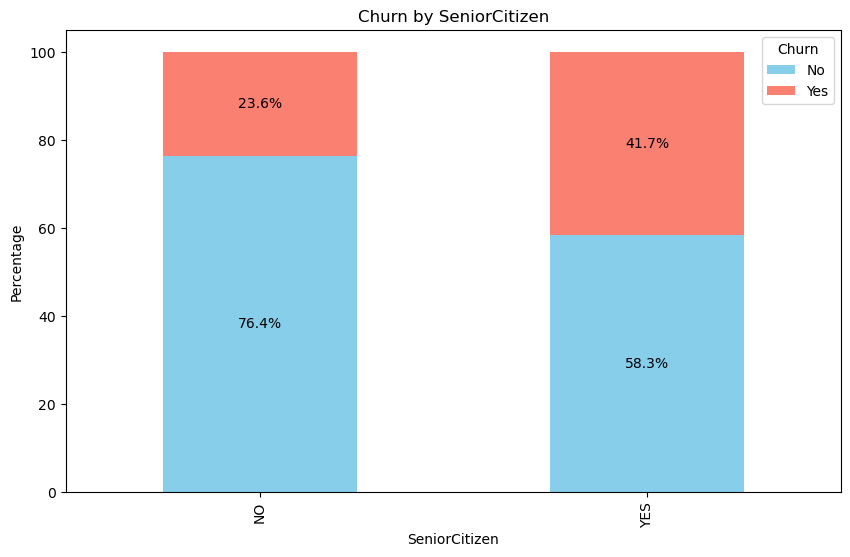

In [18]:
# Calculate the counts
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack().fillna(0)

# Calculate the percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# Add percentage labels
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title("Churn by SeniorCitizen")
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.legend(title='Churn')
plt.show()



# Comparative a greater percentage of people in the senior citizen category have churned.

<function matplotlib.pyplot.show(close=None, block=None)>

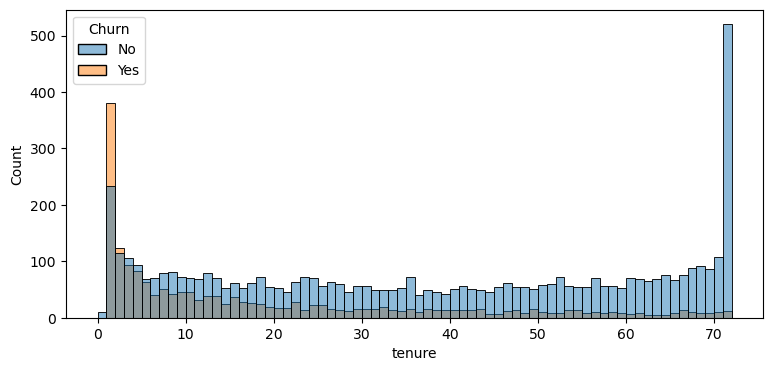

In [19]:
plt.figure(figsize = (9,4))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = "Churn")
plt.show

#People who have used our services for a long time have stayed and people who have used  
#our services for 1 or 2 months have churned.

C:\Users\dell\AppData\Local\Temp\ipykernel_11336\41700916.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:cyan'` for the same effect.

  ax = sns.countplot(x = "Contract", data = df, color='cyan', hue ='Churn')


<function matplotlib.pyplot.show(close=None, block=None)>

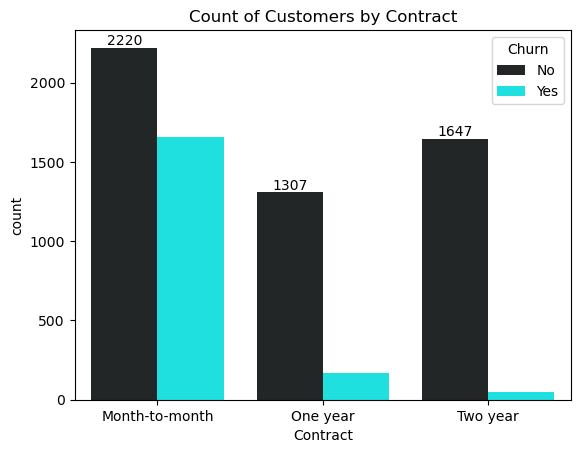

In [22]:
ax = sns.countplot(x = "Contract", data = df, color='cyan', hue ='Churn')
ax.bar_label(ax.containers[0])
plt.title('Count of Customers by Contract')

plt.show 

#People with a month-to-month contract are likelier to churn than those with 1 or 2 years of contract.

In [23]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

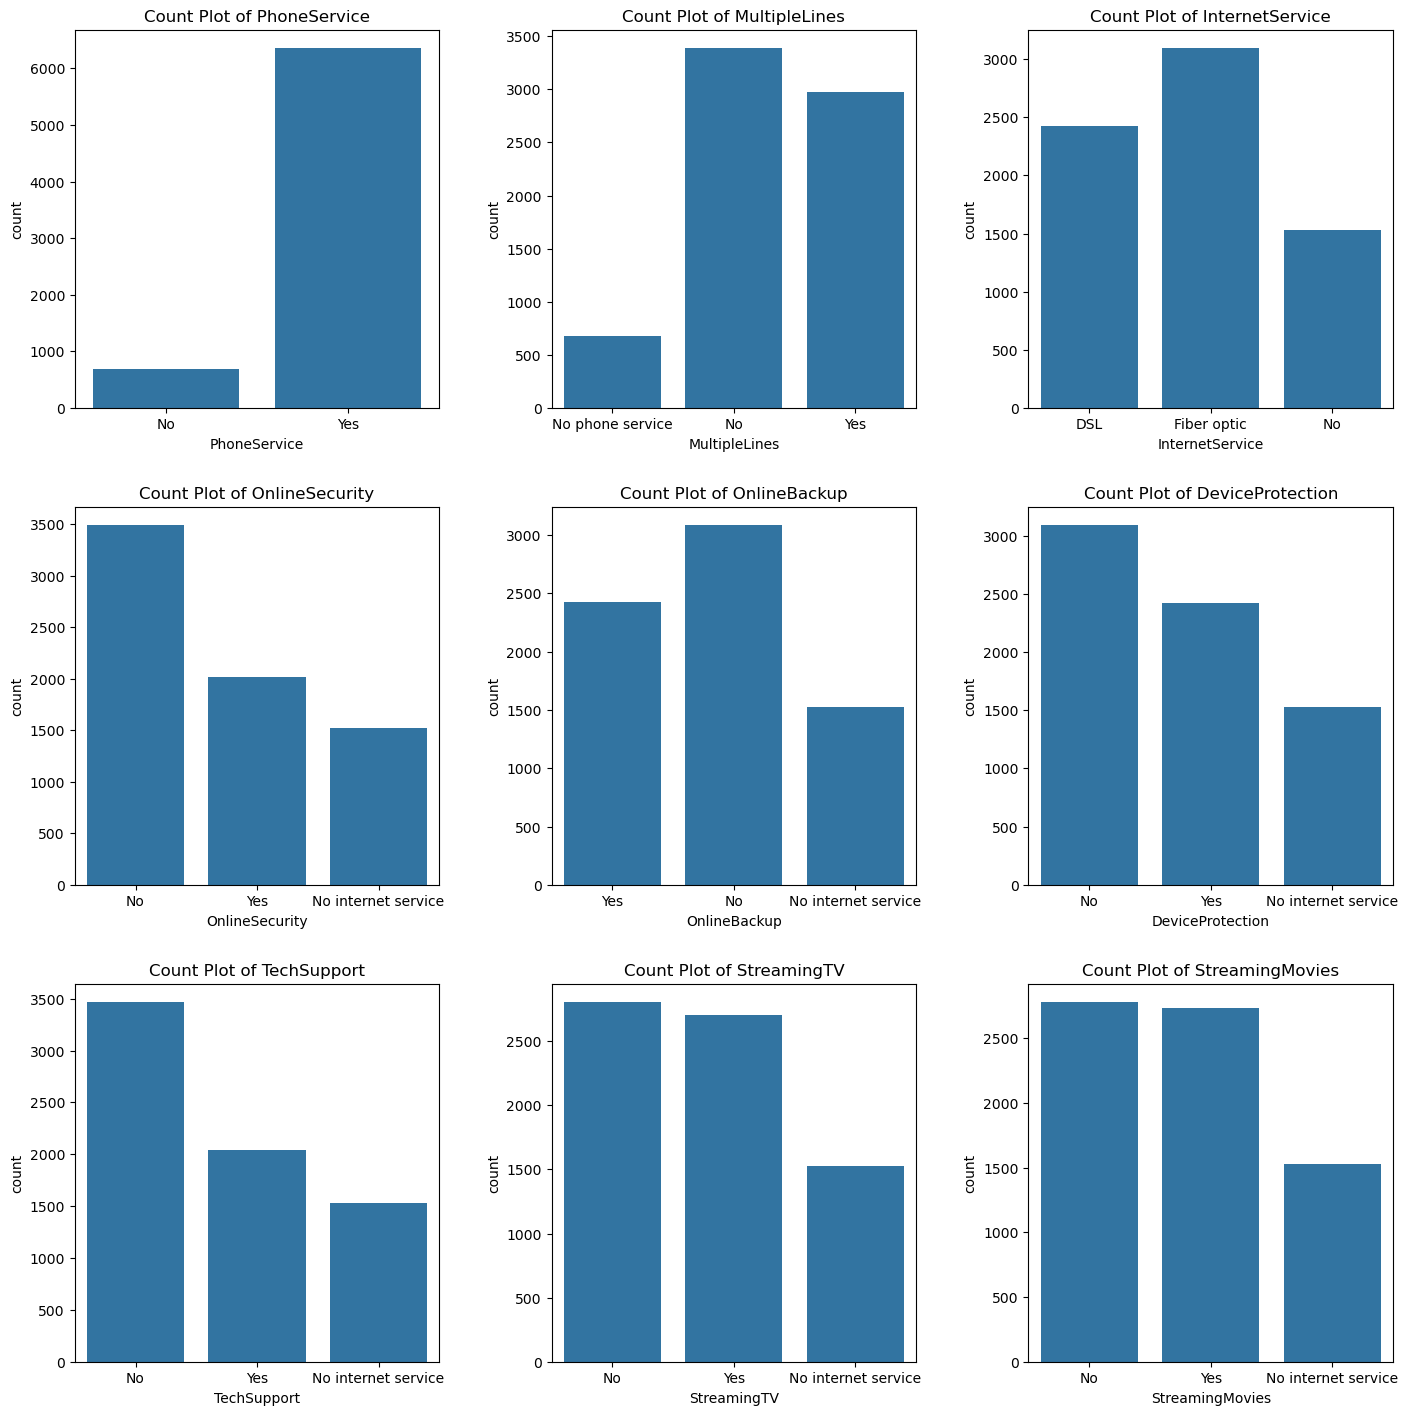

In [24]:
# Define the columns you want to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


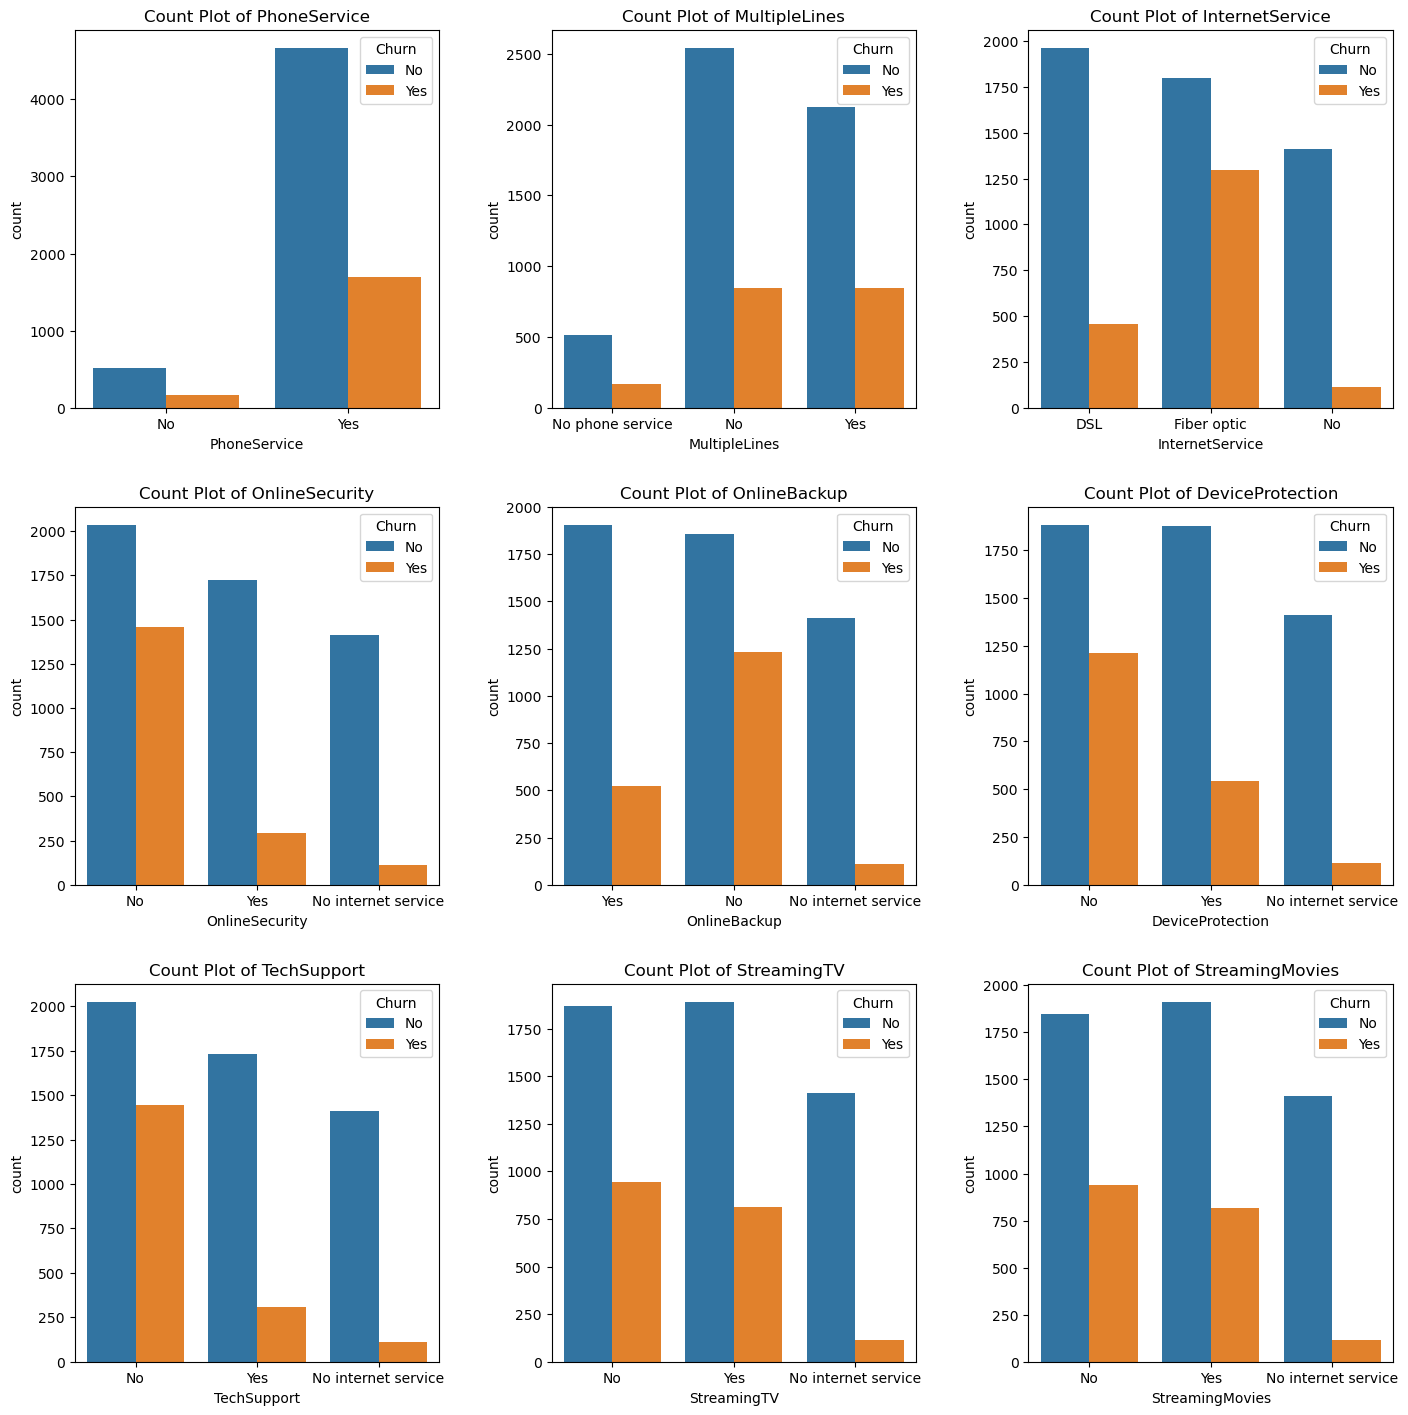

In [25]:
# Define the columns you want to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Each column represents whether a customer has subscribed to these services. The count plots visualize the distribution of subscriptions for each service, showing the number of customers who have opted for or against each service. This helps understand customer preferences and service adoption rates.

C:\Users\dell\AppData\Local\Temp\ipykernel_11336\2845980547.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:cyan'` for the same effect.

  ax = sns.countplot(x = "PaymentMethod", data = df, color='cyan', hue ='Churn')


<function matplotlib.pyplot.show(close=None, block=None)>

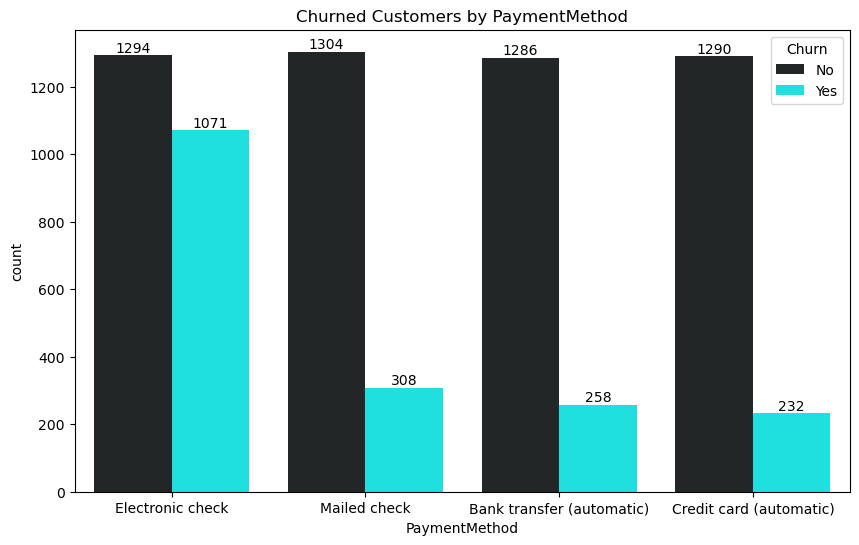

In [30]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x = "PaymentMethod", data = df, color='cyan', hue ='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned Customers by PaymentMethod')

plt.show 

# Customers are likely to churn when he is using an electronic check as a payment method.